In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [3]:
import lightgbm as lgb
import catboost as cb

In [5]:
import tensorflow as tf

In [6]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [7]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [8]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/luflow.csv'


Mounted at /content/drive


In [9]:
# Define the file paths in Google Drive
file_parquet_prepro = '/content/drive/MyDrive/VIT/Dataset/NF-ToN-IoT-v2/nf_ton_iotv2-preprocessed.csv'


# Read the CSV files back into pandas DataFrames
df_parquet_prepro = pd.read_csv(file_parquet_prepro)

# Optional: Display the first few rows and shape to verify they are loaded correctly
print("First 5 rows:")
print(df_parquet_prepro.head())
print("\nShape:")
print(df_parquet_prepro.shape)

First 5 rows:
   L4_SRC_PORT  L4_DST_PORT  PROTOCOL  L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  \
0        13601        15550         6       0.0        48        1          0   
1        48103        34886         6       0.0        48        1          0   
2        24304        35151         6       0.0        48        1          0   
3        55306          110         6       2.0       940        9       1530   
4        33753        39395         6       0.0        48        1         40   

   OUT_PKTS  TCP_FLAGS  CLIENT_TCP_FLAGS  ...  TCP_WIN_MAX_IN  \
0         0          2                 2  ...            4096   
1         0          2                 2  ...            4096   
2         0          2                 2  ...            4096   
3         8         31                30  ...           29200   
4         1         22                 2  ...            4096   

   TCP_WIN_MAX_OUT  ICMP_TYPE  ICMP_IPV4_TYPE  DNS_QUERY_ID  DNS_QUERY_TYPE  \
0                0          0

In [10]:
# Access the dtypes attribute
feature_data_types = df_parquet_prepro.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
L4_SRC_PORT                      int64
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SECOND_BYTES        float64
RETRANSMITTED_IN_BYTES           int64
RETRANSMITTED_IN_PKTS            int64
RETRANSMITTED_OUT_BYTES          int64
R

In [11]:
#Get the counts of each unique label
label_counts = df_parquet_prepro['Label'].value_counts()

#Print the results

print("\nCounts of Each Label:")
print(label_counts)


Counts of Each Label:
Label
1    362002
0    360128
Name: count, dtype: int64


**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [12]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

In [13]:
%%time
network_data_d1 = dropInfNull(df_parquet_prepro)

(722130, 43)
(722130, 43)
CPU times: user 393 ms, sys: 167 ms, total: 560 ms
Wall time: 555 ms


In an anomaly detection context, "outlier" often signifies something unusual or potentially suspicious, even if it doesn't fit a known malicious signature. Grouping "malicious" and "outlier" together allows your model to learn to distinguish between "normal" traffic and any form of unusual or potentially harmful traffic captured in these two categories.

In [14]:
df_balanced = network_data_d1

**Understanding the Data Type of the Dataset**

In [15]:
# Access the dtypes attribute
feature_data_types = df_balanced.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
L4_SRC_PORT                      int64
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SECOND_BYTES        float64
RETRANSMITTED_IN_BYTES           int64
RETRANSMITTED_IN_PKTS            int64
RETRANSMITTED_OUT_BYTES          int64
R

**Drop Constant Column**

In [16]:
%%time
# drop the constant columns (which varience is 0)
variances = df_balanced.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = df_balanced.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index([], dtype='object')
(722130, 43)
CPU times: user 164 ms, sys: 42.2 ms, total: 206 ms
Wall time: 210 ms


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


**Drop Duplicate Column**

In [17]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

{'MAX_IP_PKT_LEN'}
(722130, 42)


**Drop Columns based on correlation**

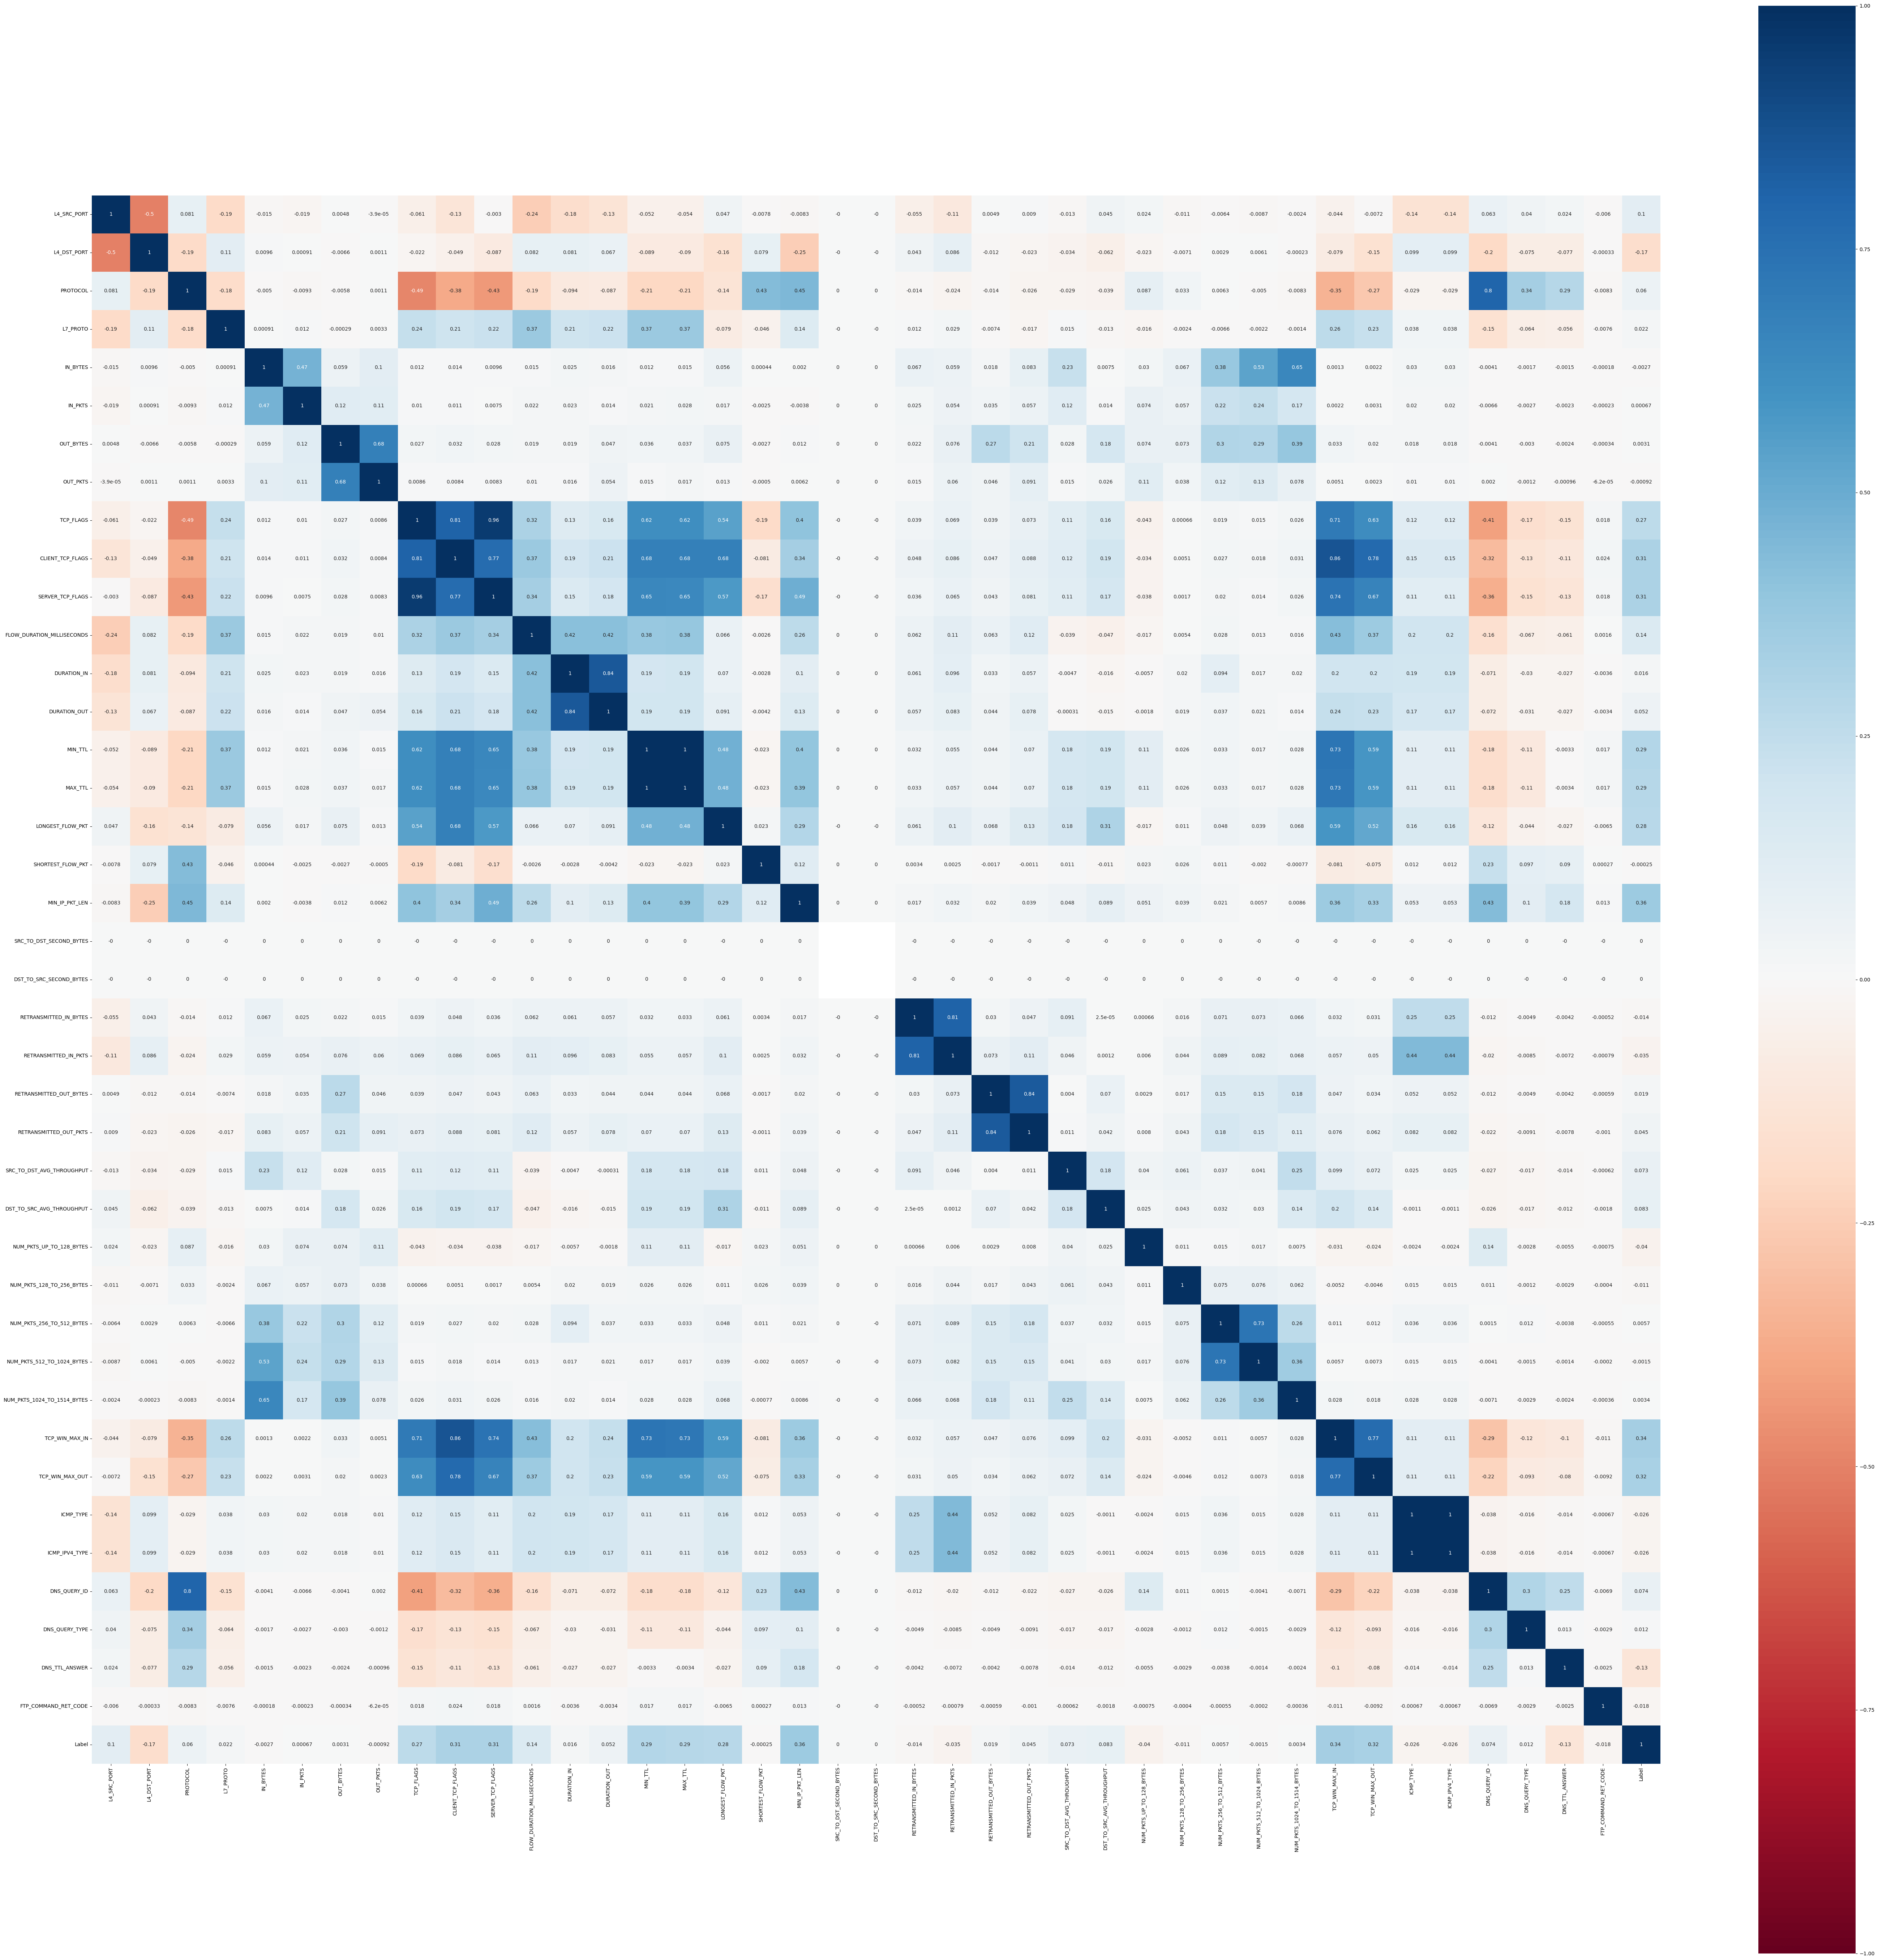

CPU times: user 9.04 s, sys: 341 ms, total: 9.38 s
Wall time: 11.8 s


In [18]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [19]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'ICMP_TYPE', 'TCP_FLAGS', 'MIN_TTL'}
3
CPU times: user 26.8 ms, sys: 961 µs, total: 27.7 ms
Wall time: 30.7 ms


In [20]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(722130, 39)
CPU times: user 38.4 ms, sys: 48.1 ms, total: 86.5 ms
Wall time: 85.6 ms


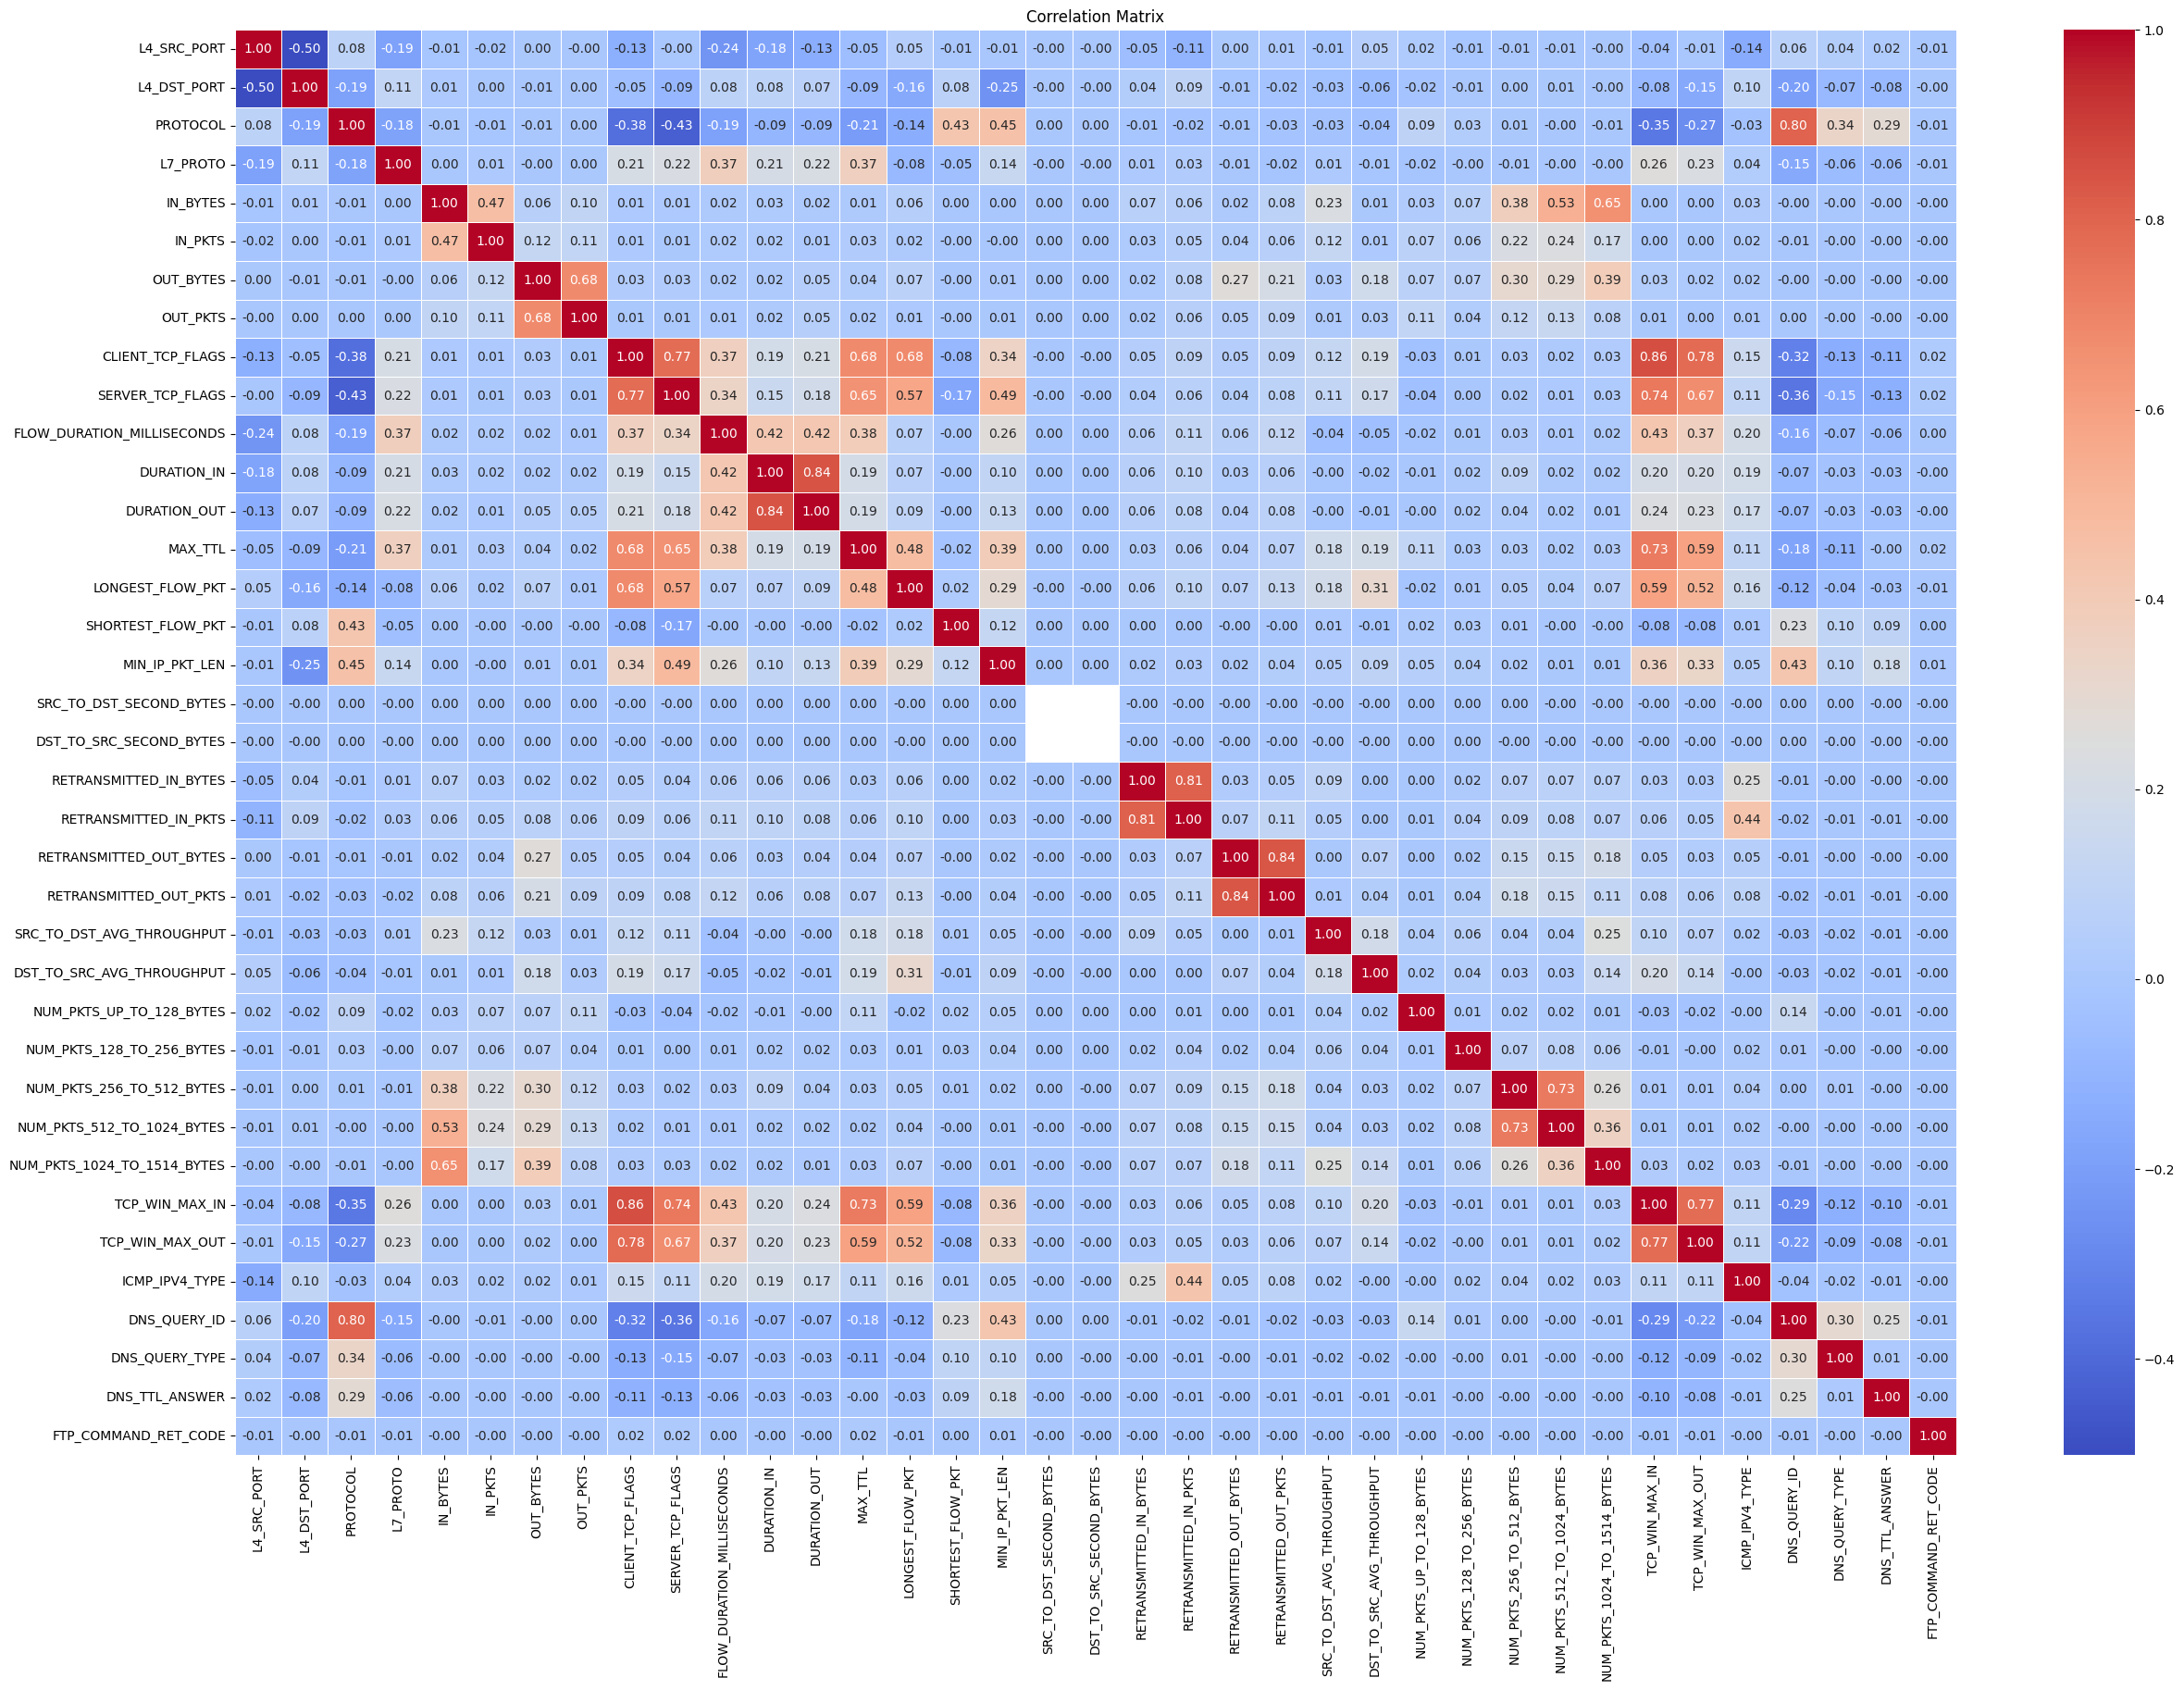

In [22]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop(['Label', 'Attack'], axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1259: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted**2
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


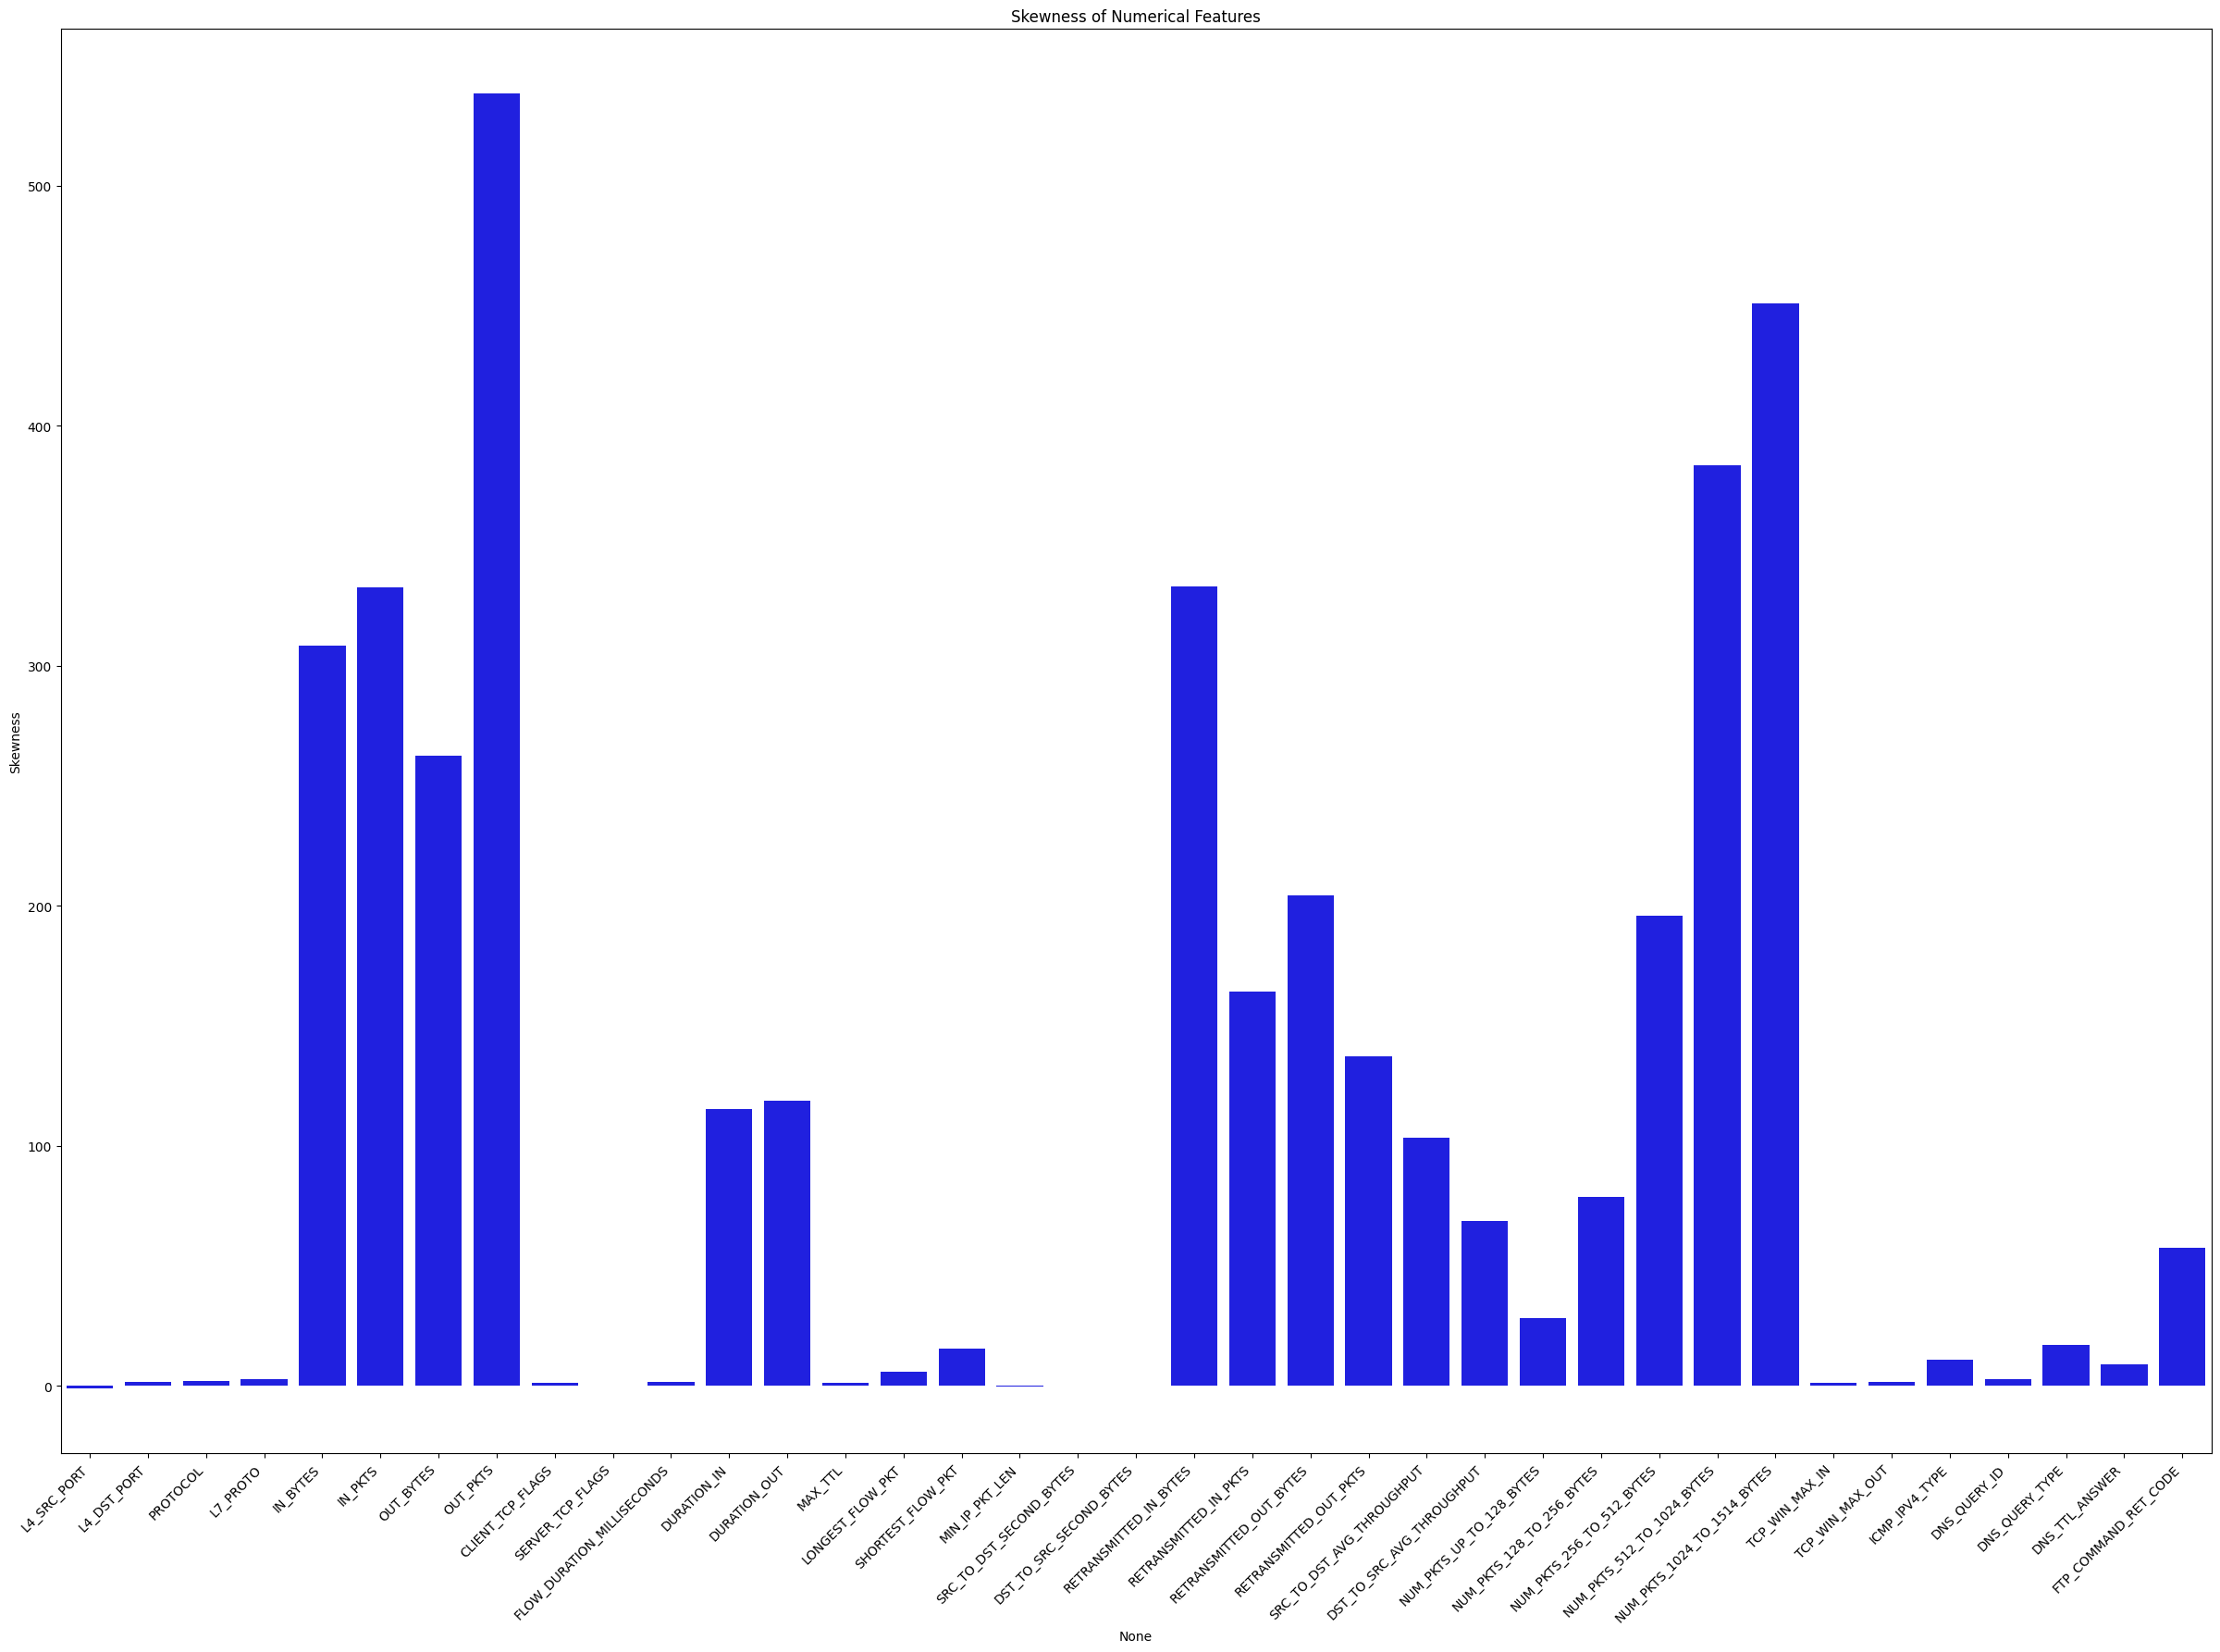

In [23]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop(['Label', 'Attack'], axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(30, 20))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [24]:
%%time
df_balanced = df_balanced.drop(["Attack"], axis=1)
X=df_balanced.drop(["Label"], axis=1)
y=df_balanced["Label"]

# split the data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

CPU times: user 462 ms, sys: 149 ms, total: 611 ms
Wall time: 660 ms


In [25]:
x_train

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE
207179,57558,80,6,7.00,276,5,180,3,18,18,...,0,0,0,29200,5792,0,0,0,0,0
235923,39512,80,6,7.00,164,3,112,2,18,19,...,0,0,0,29200,28960,0,0,0,0,0
617616,48154,995,6,91.23,410,6,1962,5,30,26,...,0,0,1,29200,28960,0,0,0,0,0
75517,18243,31510,6,0.00,48,1,0,0,2,0,...,0,0,0,4096,0,0,0,0,0,0
89330,29534,56757,6,0.00,48,1,0,0,2,0,...,0,0,0,4096,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,53208,443,6,91.00,276,5,224,4,18,19,...,0,0,0,29200,28960,0,0,0,0,0
365838,44786,443,6,0.00,1023,7,2200,4,30,26,...,3,1,1,29200,65535,0,0,0,0,0
131932,40767,53,17,0.00,65,1,81,1,0,0,...,0,0,0,0,0,0,59283,1,2583,0
671155,443,34552,6,91.00,172,3,276,5,19,18,...,0,0,0,28960,29200,0,0,0,0,0


In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(x_train)

# Transform the testing set using the same scaler
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [27]:
# --- LightGBM Model ---
print("--- Training LightGBM Model ---")

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_clf.fit(x_train, y_train)

--- Training LightGBM Model ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 289711, number of negative: 287993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.166550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5483
[LightGBM] [Info] Number of data points in the train set: 577704, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501487 -> initscore=0.005948
[LightGBM] [Info] Start training from score 0.005948


LGBMClassifier(random_state=42)

In [28]:
# Make predictions (probabilities) on the test set
y_pred_proba_lgb = lgb_clf.predict_proba(x_test)[:, 1]

# Make predictions (binary) on the test set
y_pred_lgb = lgb_clf.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


:# **Calculate the Metrics for Light GBM**



In [29]:
print("--- LightGBM ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_lgb))

--- LightGBM ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     72135
           1       0.99      0.99      0.99     72291

    accuracy                           0.99    144426
   macro avg       0.99      0.99      0.99    144426
weighted avg       0.99      0.99      0.99    144426

ROC AUC Score:
0.9990486933544587


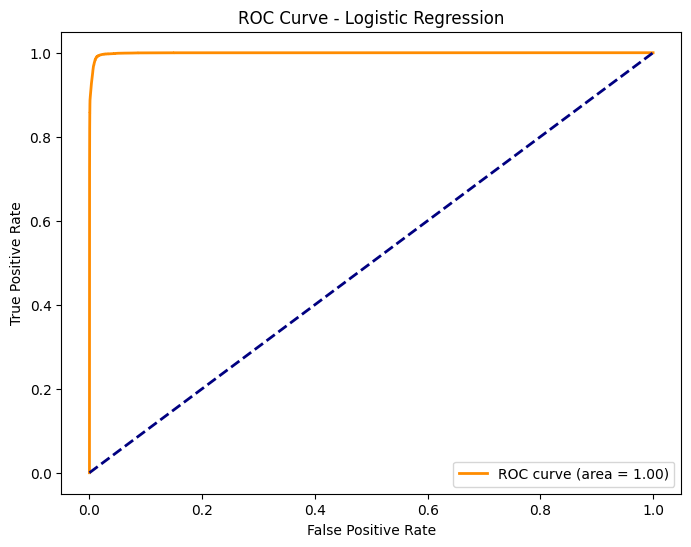

In [30]:
# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lgb)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Calculate the confusion matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lgb)

Confusion Matrix for Logistic Regression:
[[71255   880]
 [  783 71508]]


In [32]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_lgb.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 71255
False Positives (FP): 880
False Negatives (FN): 783
True Positives (TP): 71508


--- LightGBM Feature Importance ---


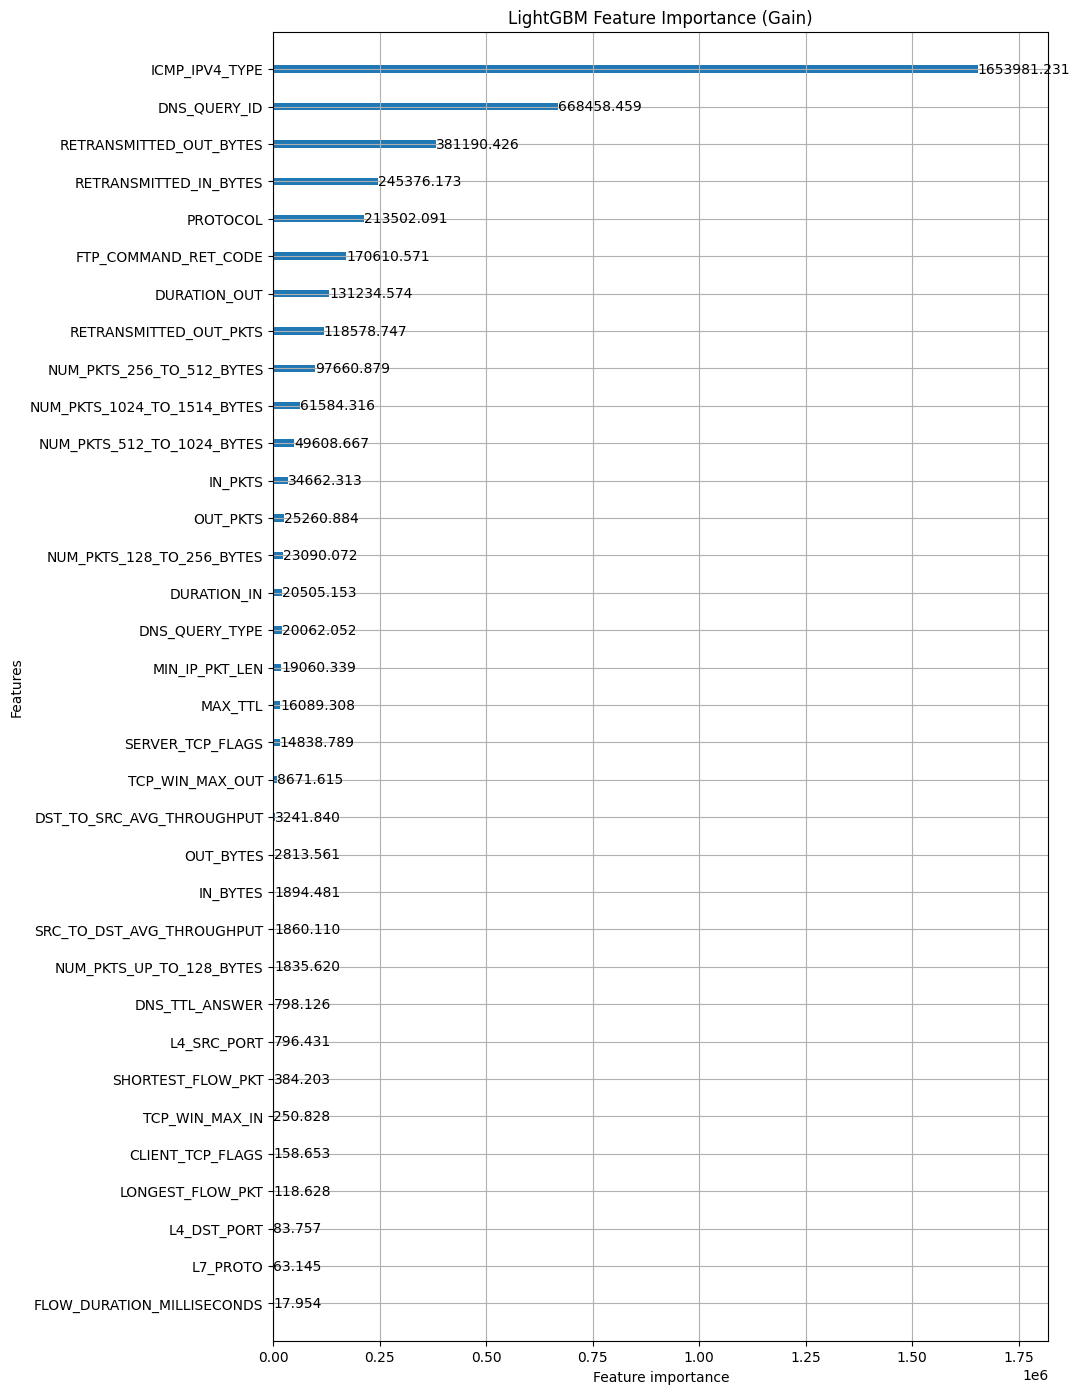

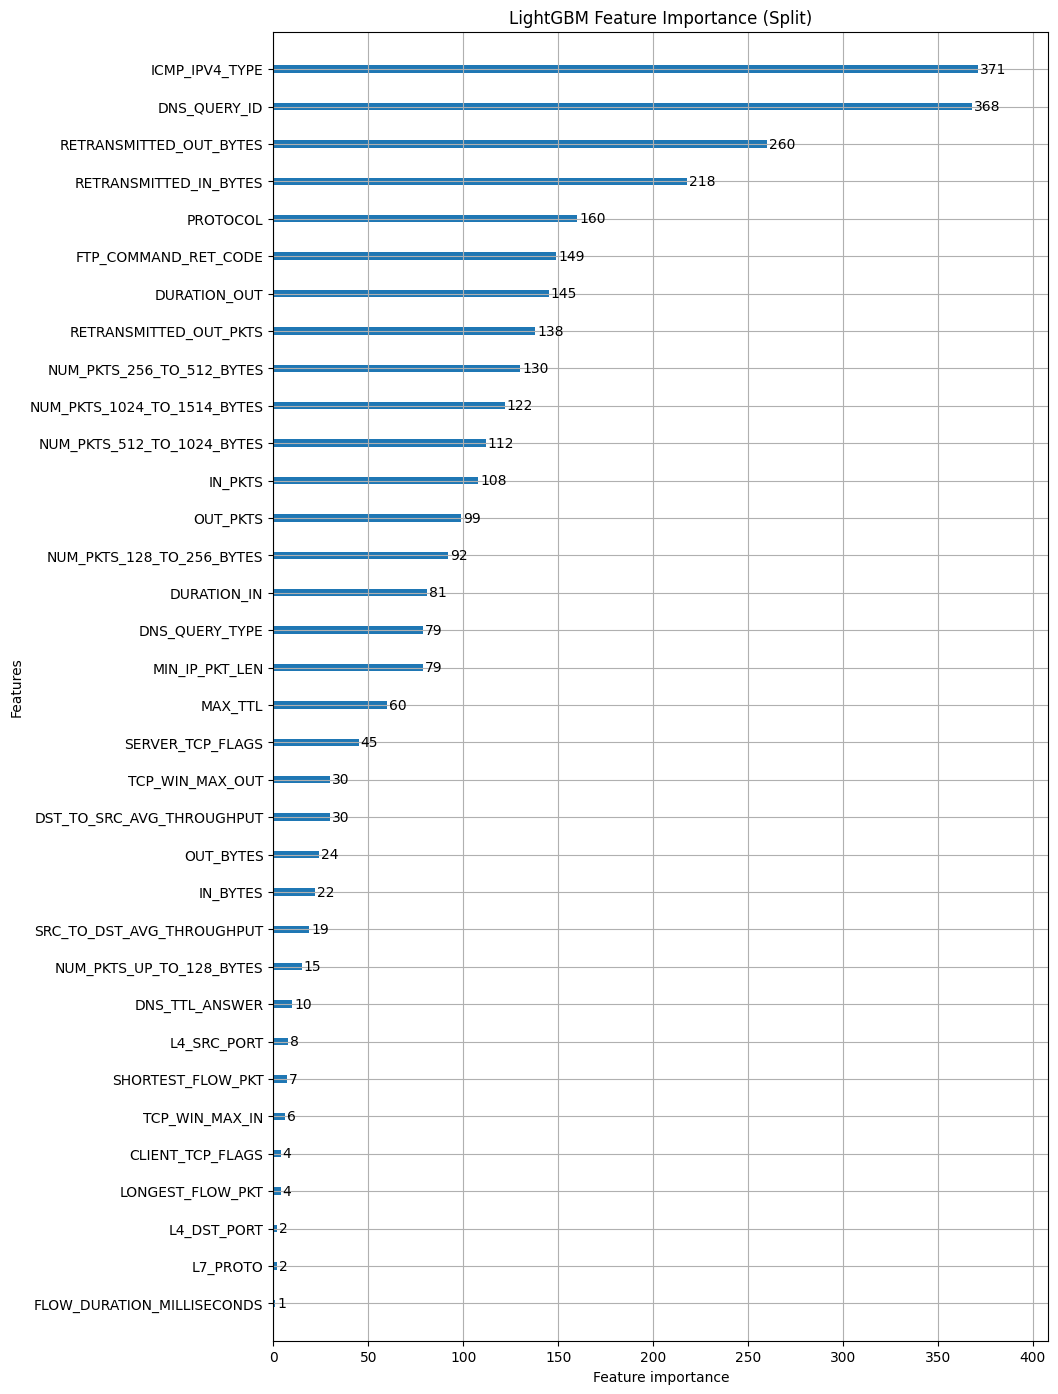

In [33]:
# Plot feature importance for LightGBM
print("--- LightGBM Feature Importance ---")

# Get the feature names from the training data
feature_names = X.columns.tolist()

# Get feature importances from the trained model
importance_gain = lgb_clf.feature_importances_
importance_split = lgb_clf.booster_.feature_importance(importance_type='split') # Use booster_ for split importance

# Create a list of (feature_name, importance) tuples
gain_importances = list(zip(feature_names, importance_gain))
split_importances = list(zip(feature_names, importance_split))

# Filter out features with zero importance for both gain and split
gain_importances_filtered = [(name, imp) for name, imp in gain_importances if imp > 0]
split_importances_filtered = [(name, imp) for name, imp in split_importances if imp > 0]

# Sort the filtered features by importance in descending order
gain_importances_filtered.sort(key=lambda x: x[1], reverse=True)
split_importances_filtered.sort(key=lambda x: x[1], reverse=True)

# Extract the sorted feature names
sorted_gain_feature_names = [name for name, imp in gain_importances_filtered]
sorted_split_feature_names = [name for name, imp in split_importances_filtered]

# Create a figure and axes for the gain plot
fig_gain, ax_gain = plt.subplots(figsize=(10, len(sorted_gain_feature_names) * 0.5)) # Adjust figure size based on number of features

# Pass the axes object to plot_importance.
# We still pass the clf and ax, and let plot_importance handle the plotting logic.
# It will plot the features with importance > 0 by default.
lgb.plot_importance(lgb_clf, importance_type='gain', ax=ax_gain, max_num_features=len(sorted_gain_feature_names)) # Set max_num_features to match filtered list
plt.title('LightGBM Feature Importance (Gain)')
# Set the y-axis tick labels using the filtered and sorted feature names
ax_gain.set_yticklabels(sorted_gain_feature_names)
plt.show()

# Create a figure and axes for the split plot
fig_split, ax_split = plt.subplots(figsize=(10, len(sorted_split_feature_names) * 0.5)) # Adjust figure size

# Pass the axes object to plot_importance
lgb.plot_importance(lgb_clf, importance_type='split', ax=ax_split, max_num_features=len(sorted_split_feature_names)) # Set max_num_features to match filtered list
plt.title('LightGBM Feature Importance (Split)')
# Set the y-axis tick labels using the filtered and sorted feature names
ax_split.set_yticklabels(sorted_split_feature_names)
plt.show()



```

```

**CatBoost**

In [34]:
# Initialize CatBoost classifier
# 'verbose=0' suppresses training output
cat_clf = cb.CatBoostClassifier(iterations=100, # Number of trees
                                 learning_rate=0.1,
                                 loss_function='Logloss', # For binary classification
                                 eval_metric='AUC',
                                 random_state=42,
                                 verbose=0)

In [35]:
# Train the model
cat_clf.fit(x_train, y_train)

In [36]:
# Make predictions (probabilities) on the test set
y_pred_proba_cat = cat_clf.predict_proba(x_test)[:, 1]

In [37]:
# Make predictions (binary) on the test set
y_pred_cat = cat_clf.predict(x_test)

--- CatBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     72135
           1       0.98      0.98      0.98     72291

    accuracy                           0.98    144426
   macro avg       0.98      0.98      0.98    144426
weighted avg       0.98      0.98      0.98    144426

ROC AUC Score:
0.9983030010644203


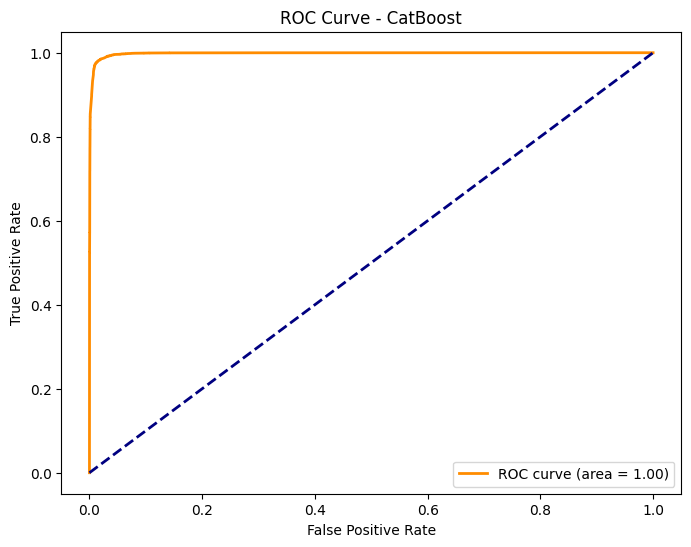

In [38]:
# Evaluate
print("--- CatBoost ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_cat))
# Plot ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_cat)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Calculate the confusion matrix
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)

# Print the confusion matrix
print("Confusion Matrix for CatBoost:")
print(conf_matrix_cat)

Confusion Matrix for CatBoost:
[[71027  1108]
 [ 1374 70917]]


In [40]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_cat.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 71027
False Positives (FP): 1108
False Negatives (FN): 1374
True Positives (TP): 70917


--- CatBoost Feature Importance ---


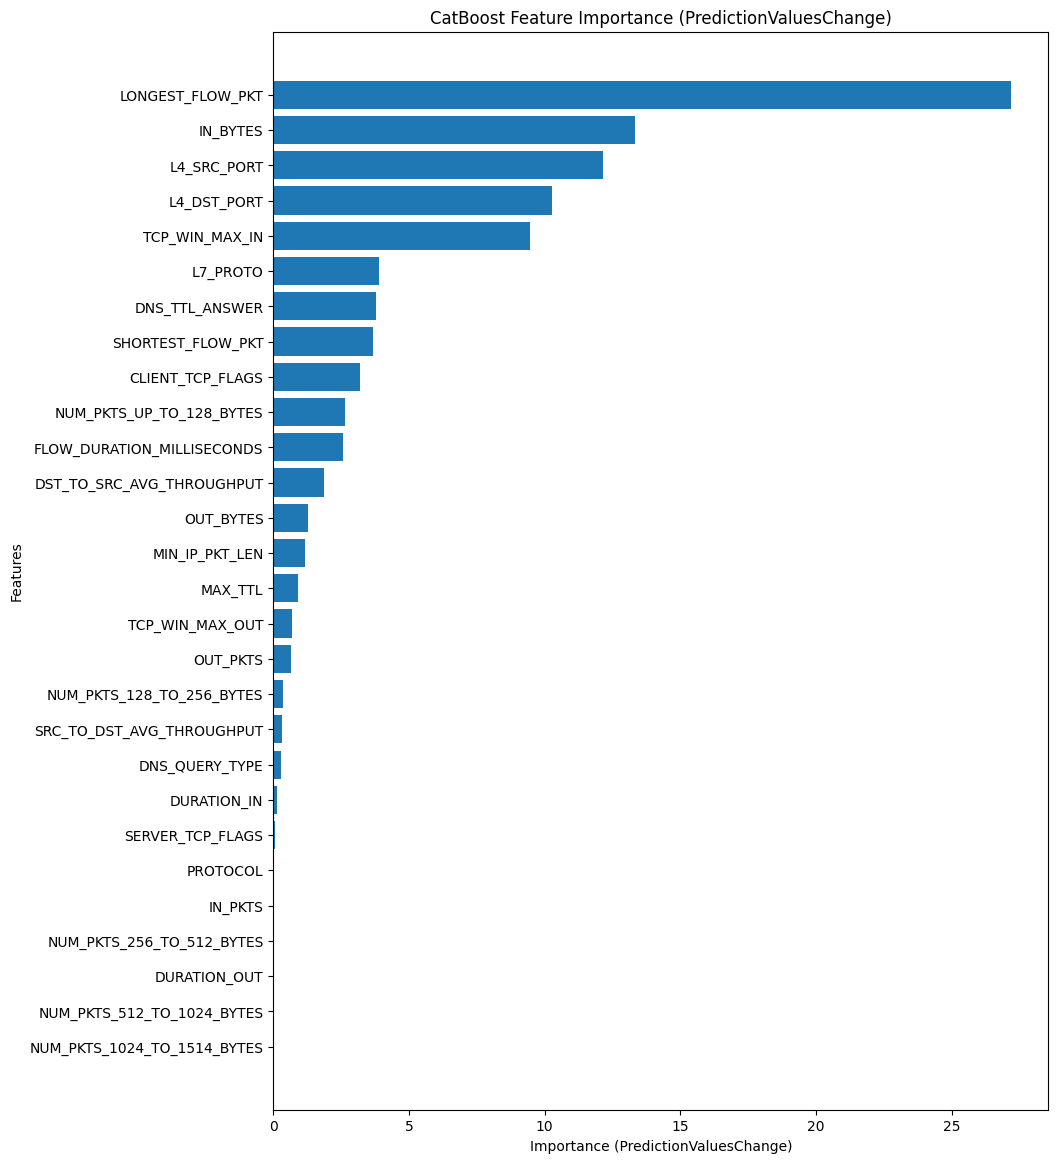

In [41]:
# Plot feature importance for CatBoost
print("--- CatBoost Feature Importance ---")

# Get the feature names from the training data (same as for LightGBM)
feature_names = X.columns.tolist()

# Get feature importances from the trained CatBoost model
# Using 'PredictionValuesChange' importance type
# Correcting the call to get_feature_importance by passing the type as the first argument
importance_catboost = cat_clf.get_feature_importance(type='PredictionValuesChange') # Use 'type' argument

# Create a list of (feature_name, importance) tuples
catboost_importances = list(zip(feature_names, importance_catboost))

# Filter out features with zero importance
catboost_importances_filtered = [(name, imp) for name, imp in catboost_importances if imp > 0]

# Sort the filtered features by importance in descending order
catboost_importances_filtered.sort(key=lambda x: x[1], reverse=True)

# Extract the sorted feature names and importances for plotting
sorted_catboost_feature_names = [name for name, imp in catboost_importances_filtered]
sorted_catboost_importances_values = [imp for name, imp in catboost_importances_filtered]

# Create a figure and axes for the CatBoost feature importance plot
fig_cat, ax_cat = plt.subplots(figsize=(10, len(sorted_catboost_feature_names) * 0.5)) # Adjust figure size

# Create a bar plot of the filtered and sorted feature importances
ax_cat.barh(sorted_catboost_feature_names, sorted_catboost_importances_values)

plt.title('CatBoost Feature Importance (PredictionValuesChange)')
plt.xlabel('Importance (PredictionValuesChange)')
plt.ylabel('Features')
# Invert the y-axis to have the most important feature at the top
ax_cat.invert_yaxis()
plt.show()